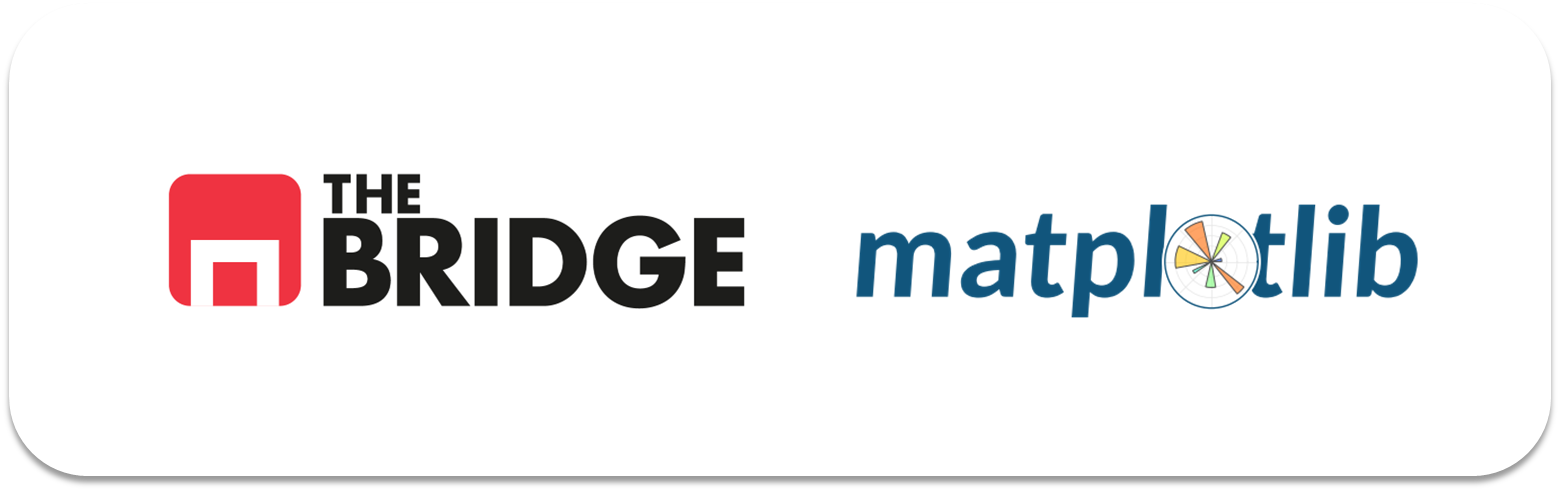

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [19]:
# Entorno virtual

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
import matplotlib
import matplotlib.font_manager

matplotlib.font_manager.findfont('Bradley Hand ITC')

'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\bradhitc.ttf'

In [22]:
print(matplotlib.get_cachedir())

C:\Users\Lenovo\.matplotlib


## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [23]:
df_cali = pd.read_csv("./data/california_cities.csv")

In [24]:
df_cali.isna().sum() / len(df_cali) * 100

Unnamed: 0            0.000000
city                  0.000000
latd                  0.000000
longd                 0.000000
elevation_m           9.958506
elevation_ft          2.489627
population_total      0.000000
area_total_sq_mi      0.414938
area_land_sq_mi       0.000000
area_water_sq_mi      0.207469
area_total_km2        1.037344
area_land_km2         0.829876
area_water_km2        0.829876
area_water_percent    1.037344
dtype: float64

In [25]:
df_cali.dropna(inplace=True)

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

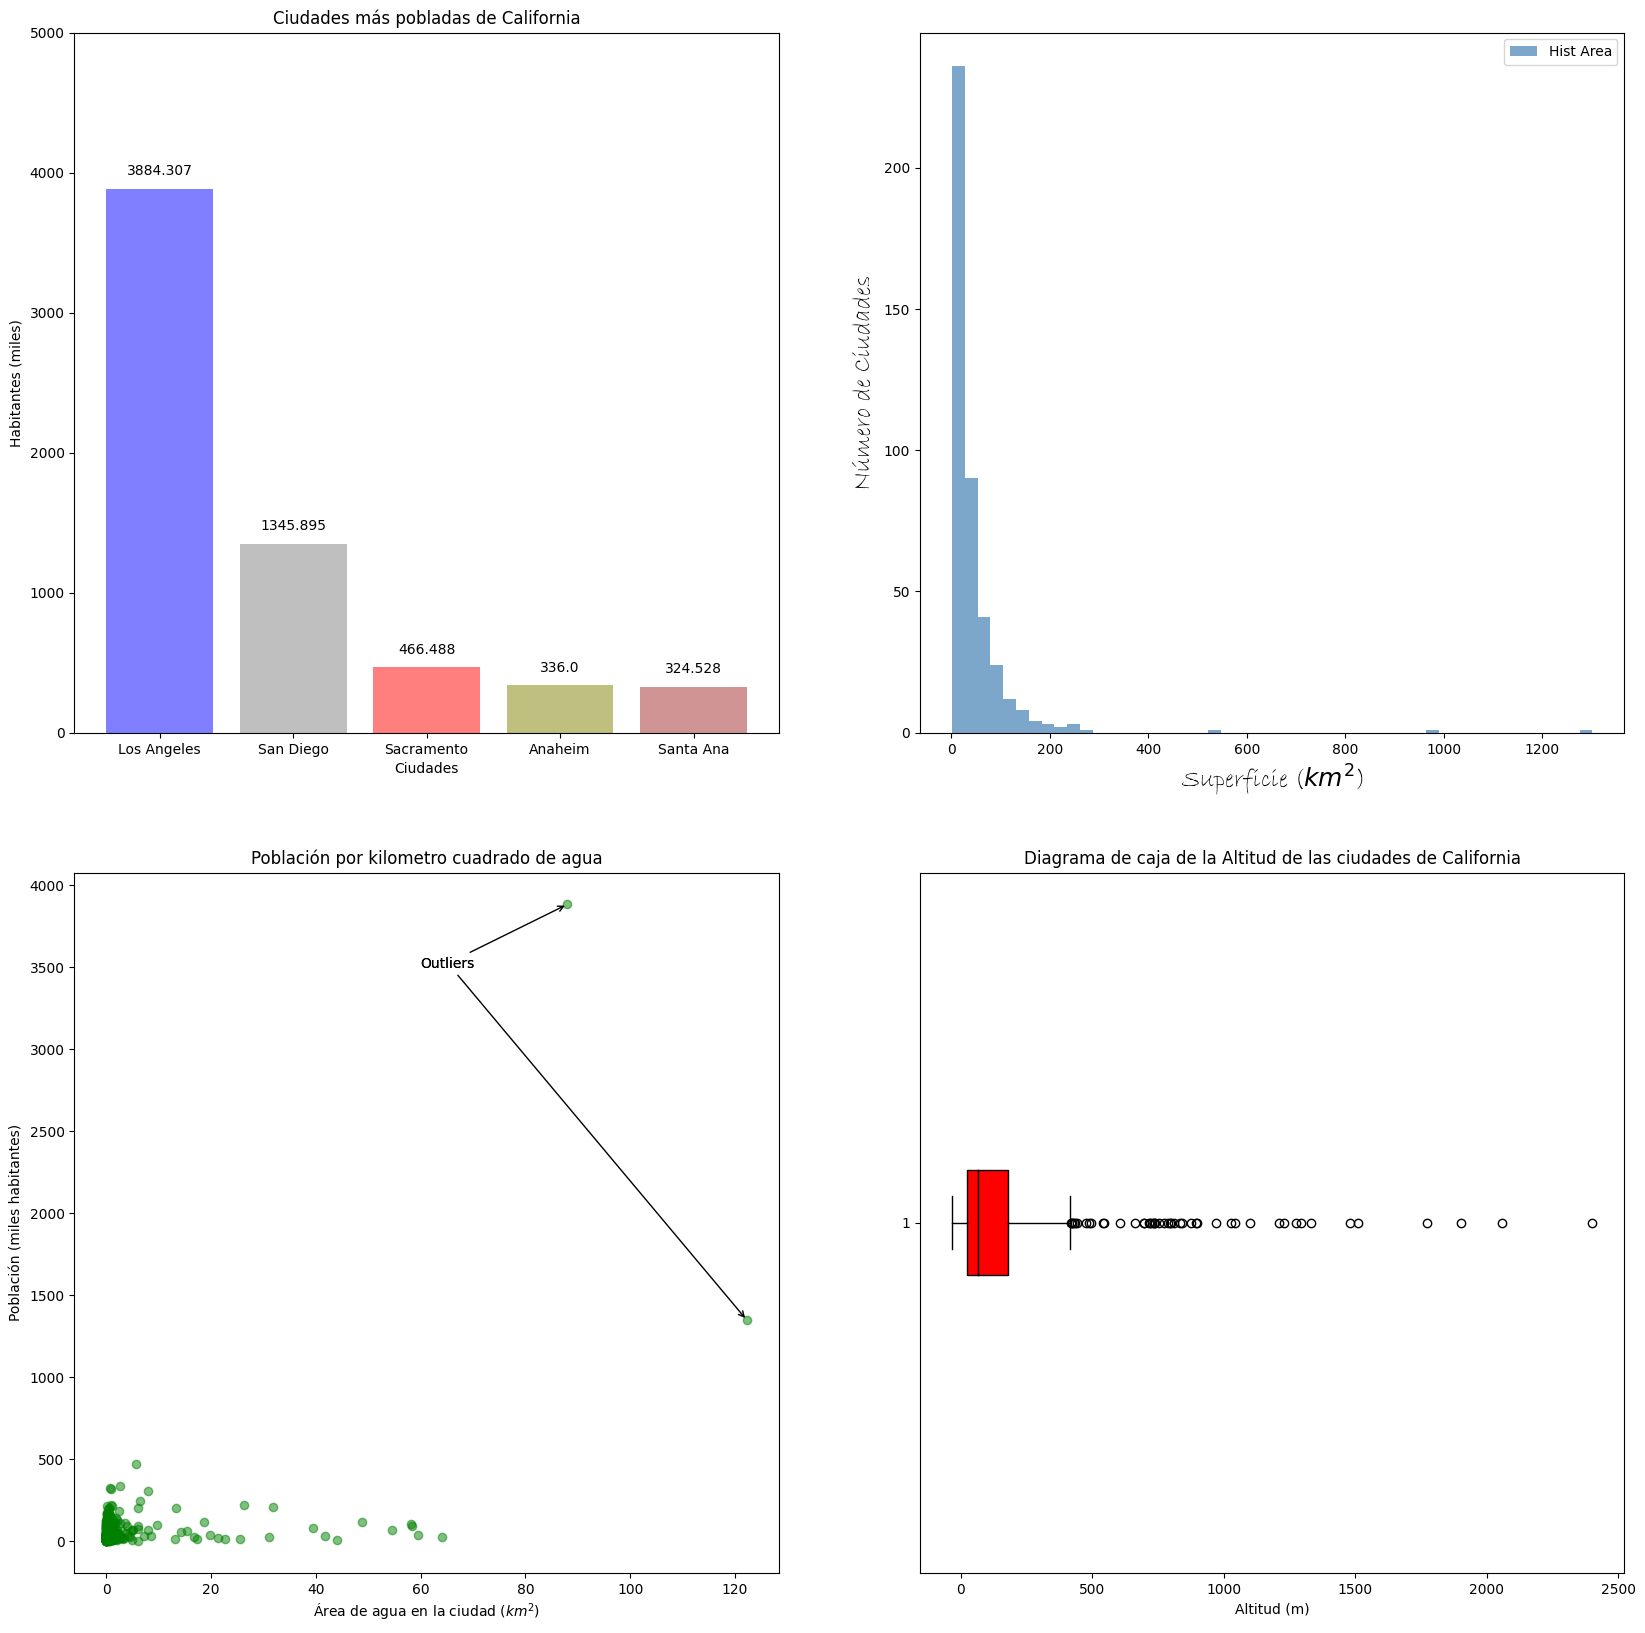

SOL Figura 1

In [26]:
ciudades_mas_pobladas = df_cali.loc[df_cali.population_total.nlargest(5).index, ["city","population_total"]]

In [27]:
ciudades_mas_pobladas["city"].tolist()

['LosAngeles', 'SanDiego', 'Sacramento', 'Anaheim', 'SantaAna']

In [28]:
ciudades_mas_pobladas["population_total"] / 1000

239    3884.307
367    1345.895
359     466.488
9       336.000
386     324.528
Name: population_total, dtype: float64

In [29]:
list(enumerate(ciudades_mas_pobladas.set_index("city").index))

[(0, 'LosAngeles'),
 (1, 'SanDiego'),
 (2, 'Sacramento'),
 (3, 'Anaheim'),
 (4, 'SantaAna')]

In [30]:
def separa_nombre(nombre):
    nuevo = nombre[0]
    for letra in nombre[1:]:
        if letra == letra.upper():
            nuevo += " "
        nuevo += letra
    return nuevo

In [31]:
separa_nombre("SantoDomingoDeLaCalzada")

'Santo Domingo De La Calzada'

In [39]:
ciudades_mas_pobladas = df_cali.loc[df_cali.population_total.nlargest(5).index, ["city","population_total"]]
ciudades_mas_pobladas

,city,population_total
239,LosAngeles,3884307
367,SanDiego,1345895
359,Sacramento,466488
9,Anaheim,336000
386,SantaAna,324528


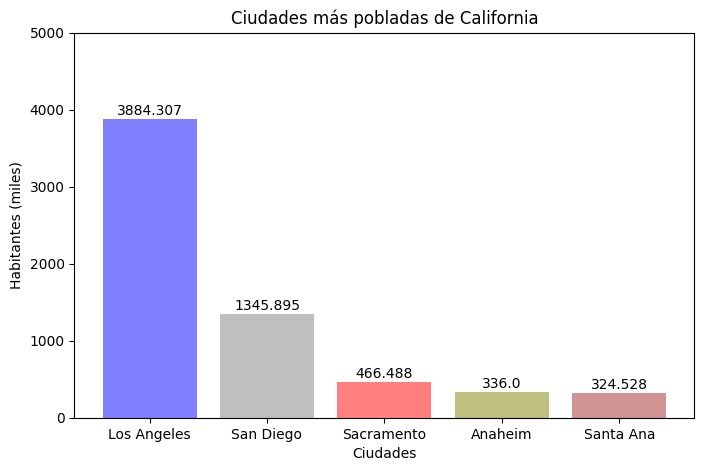

In [40]:
def separa_nombre(nombre):
    nuevo = nombre[0]
    for letra in nombre[1:]:
        if letra == letra.upper():
            nuevo += " "
        nuevo += letra
    return nuevo

ciudades_mas_pobladas = df_cali.loc[df_cali.population_total.nlargest(5).index, ["city","population_total"]]
ciudades = [separa_nombre(ciudad) for ciudad in ciudades_mas_pobladas["city"].tolist()]
colores = ["blue","gray","red","olive","brown"]

plt.figure(figsize=(8,5))
plt.bar(x = ciudades,
        height = ciudades_mas_pobladas["population_total"] / 1000,
        color= colores,
        alpha= 0.5)
plt.ylim([0,5000])
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")
plt.title("Ciudades más pobladas de California")

ciudades_mas_pobladas.set_index("city", inplace = True)

for indice, ciudad in enumerate(ciudades_mas_pobladas.index):
    poblacion = ciudades_mas_pobladas.loc[ciudad,"population_total"]/1000
    plt.text(ciudades[indice], poblacion + 50, f"{poblacion}", ha = "center")



plt.show()

Sol Figura 3

<Axes: >

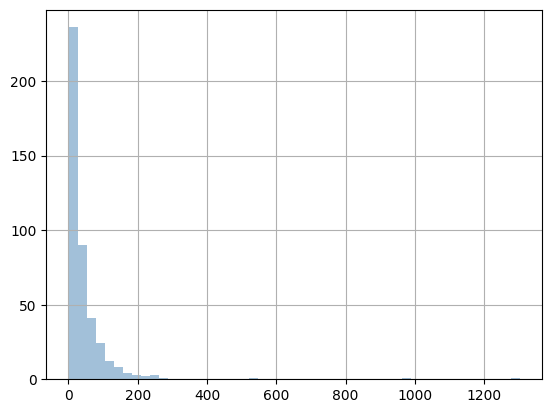

In [44]:
df_cali["area_total_km2"].hist(bins=50,color="steelblue",alpha=0.5)

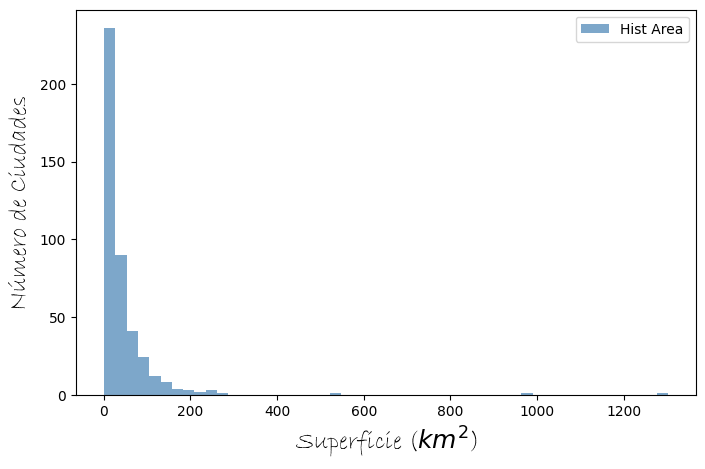

In [50]:
plt.figure(figsize=(8,5))

plt.hist(df_cali["area_total_km2"],
         color= "steelblue",
         alpha= 0.7,
         bins= 50,
         label= "Hist Area")

plt.xlabel("Superficie ($km^2$)", fontdict = dict(family= "Bradley Hand ITC", size = 18))
plt.ylabel("Número de Ciudades", fontdict = dict(family= "Bradley Hand ITC", size = 18))
plt.legend()


plt.show()

Sol Figura 3

In [51]:
df_cali["area_water_km2"]

0      0.046
1      0.076
4      0.003
5      0.000
6      0.036
       ...  
477    0.000
478    0.188
479    0.201
480    0.013
481    0.000
Name: area_water_km2, Length: 427, dtype: float64

In [52]:
df_cali["population_total"] / 1000

0      31.765
1      20.330
4      83.089
5      47.823
6       2.827
        ...  
477     2.933
478     7.765
479    64.925
480    51.367
481    20.700
Name: population_total, Length: 427, dtype: float64

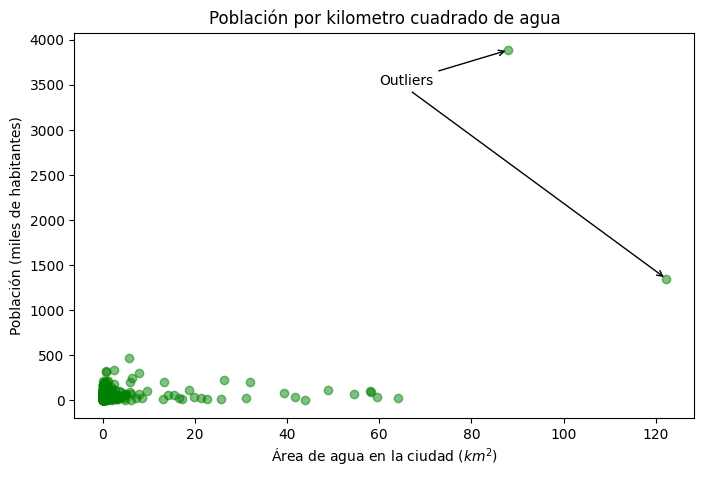

In [65]:
plt.figure(figsize=(8,5))

plt.scatter(df_cali["area_water_km2"],
            df_cali["population_total"] / 1000,
            alpha= 0.5,
            color= "green")
plt.xlabel("Área de agua en la ciudad ($km^2$)")
plt.ylabel("Población (miles de habitantes)")
plt.title("Población por kilometro cuadrado de agua")

outlier_1_y = df_cali.population_total.nlargest(2).iloc[0]
outlier_2_y = df_cali.population_total.nlargest(2).iloc[1]
outlier_1_x = df_cali.loc[df_cali.population_total.nlargest(2).index, "area_water_km2"].values[0]
outlier_2_x = df_cali.loc[df_cali.population_total.nlargest(2).index, "area_water_km2"].values[1]

plt.annotate(
    xy=(float(outlier_1_x), float(outlier_1_y) / 1000), 
    xytext=(60, 3500), 
    text="Outliers", 
    arrowprops=dict(arrowstyle="->")
)

plt.annotate(
    xy=(float(outlier_2_x), float(outlier_2_y) / 1000), 
    xytext=(60, 3500), 
    text=" " * len("Outliers"), 
    arrowprops=dict(arrowstyle="->")
)

plt.show()

Sol Figura 4

<Axes: >

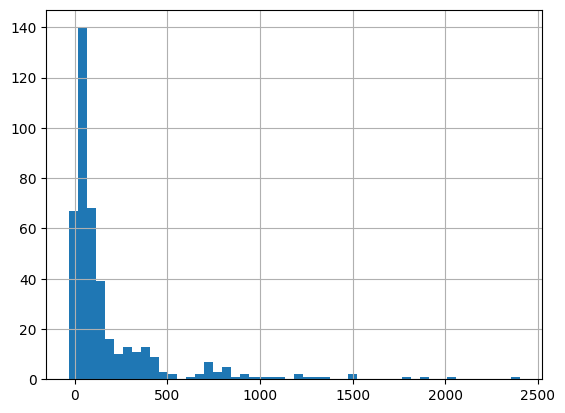

In [66]:
df_cali["elevation_m"].hist(bins=50)

<Axes: >

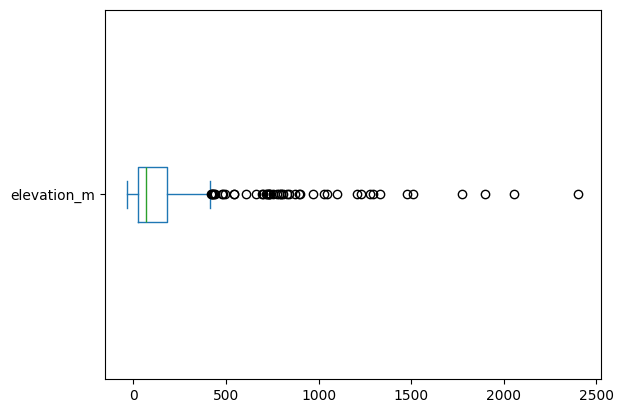

In [68]:
df_cali["elevation_m"].plot(kind="box", vert= False)

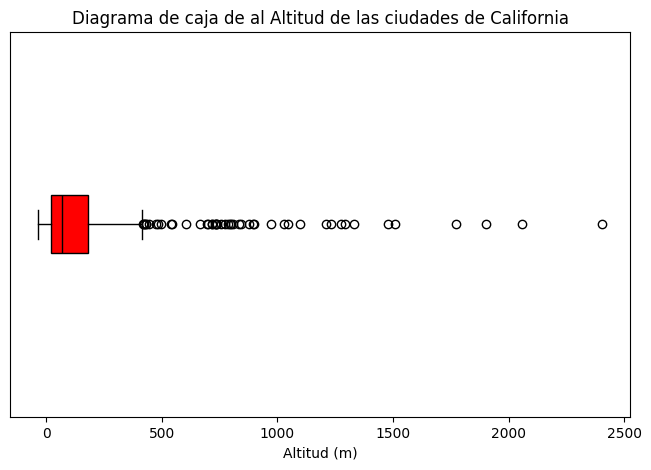

In [74]:
plt.figure(figsize=(8,5))
plt.boxplot(df_cali["elevation_m"],
            vert = False, 
            boxprops=dict(facecolor = "red"),
            medianprops=dict(color= "black"),
            patch_artist=True)

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de al Altitud de las ciudades de California")
plt.yticks([])

plt.show()


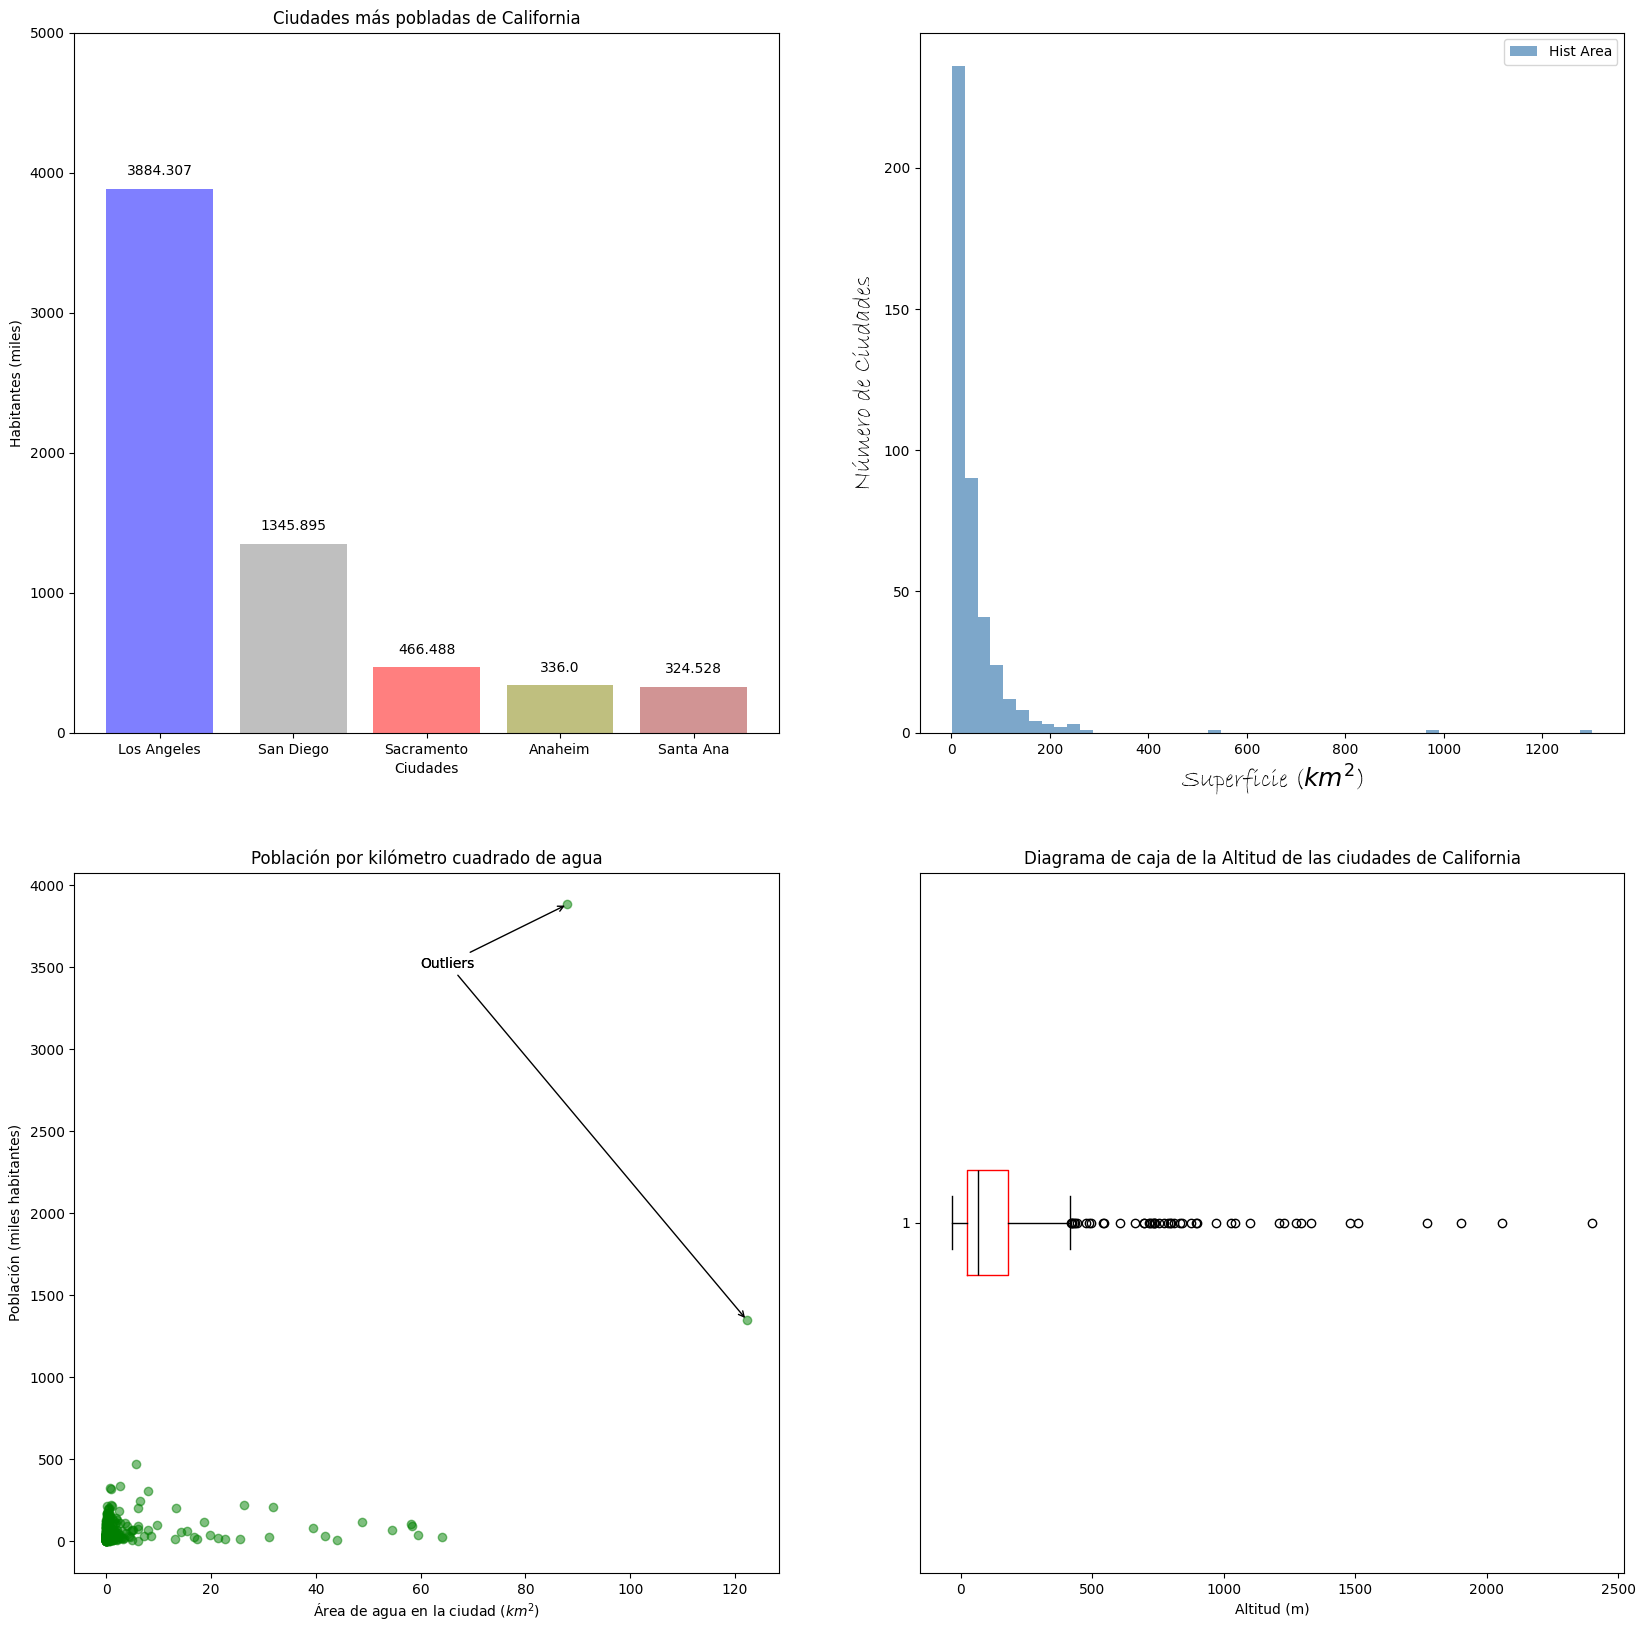

In [76]:
# Todas juntas

# Crear subgráficos
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()

# Primera figura
primera = axs[0]
ciudades_mas_pobladas = df_cali.loc[df_cali.population_total.nlargest(5).index, ["city", "population_total"]]
ciudades = [separa_nombre(ciudad) for ciudad in ciudades_mas_pobladas["city"].to_list()]
colores = ["blue", "gray", "red", "olive", "brown"]

primera.bar(x=ciudades, height=ciudades_mas_pobladas["population_total"] / 1000, color=colores, alpha=0.5)
primera.set_ylim([0, 5000])
primera.set_ylabel("Habitantes (miles)")
primera.set_xlabel("Ciudades")

ciudades_mas_pobladas.set_index("city", inplace=True)
for indice, ciudad in enumerate(ciudades_mas_pobladas.index):
    poblacion = ciudades_mas_pobladas.loc[ciudad, "population_total"] / 1000
    primera.text(ciudades[indice], poblacion + 100, f"{poblacion}", ha="center")

primera.set_title("Ciudades más pobladas de California")

# Segunda gráfica
segunda = axs[1]
segunda.hist(df_cali["area_total_km2"], color="steelblue", alpha=0.7, bins=50, label="Hist Area")
segunda.set_xlabel("Superficie ($km^2$)", fontdict=dict(family="Bradley Hand ITC", size=18))
segunda.set_ylabel("Número de Ciudades", fontdict=dict(family="Bradley Hand ITC", size=18))
segunda.legend()

# Tercera gráfica
tercera = axs[2]
tercera.scatter(df_cali["area_water_km2"], df_cali["population_total"] / 1000, alpha=0.5, color="green")
tercera.set_xlabel("Área de agua en la ciudad ($km^2$)")
tercera.set_ylabel("Población (miles habitantes)")
tercera.set_title("Población por kilómetro cuadrado de agua")

outlier_1_y = ciudades_mas_pobladas.population_total.max()
outlier_2_y = ciudades_mas_pobladas.population_total.nlargest(2).iloc[1]
outlier_1_x = df_cali.loc[df_cali.population_total == outlier_1_y, "area_water_km2"].values[0]
outlier_2_x = df_cali.loc[df_cali.population_total == outlier_2_y, "area_water_km2"].values[0]

tercera.annotate(
    xy=(outlier_1_x, outlier_1_y / 1000),
    xytext=(60, 3500),
    text="Outliers",
    arrowprops=dict(arrowstyle="->")
)

tercera.annotate(
    xy=(outlier_2_x, outlier_2_y / 1000),
    xytext=(60, 3500),
    text="Outliers",
    arrowprops=dict(arrowstyle="->")
)

# Cuarta gráfica
cuarta = axs[3]
cuarta.boxplot(df_cali["elevation_m"].dropna(), vert=False, 
               boxprops=dict(color="red"),  # Corrección aquí
               medianprops=dict(color="black"))
cuarta.set_xlabel("Altitud (m)")
cuarta.set_title("Diagrama de caja de la Altitud de las ciudades de California")

# Mostrar gráficos
plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [77]:
fig.savefig("practica_obligatoria.png")